In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters

%matplotlib inline

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV



In [72]:
nba_df = pd.read_csv('draft_nba.csv')
nba_df.head()

,draft_Player,draft_All_NBA,draft_All.Star,draft_Draft_Yr,draft_Pk,draft_Team,draft_College,draft_Yrs,draft_Games,draft_Minutes.Played,...,nba_ORB,nba_DRB,nba_TRB,nba_AST,nba_STL,nba_BLK,nba_TOV,nba_PF,nba_PTS,Traded
0,Speedy Claxton,0,0,2000,20,PHI,Hofstra University,7,334,8548,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mark Karcher,0,0,2000,48,PHI,Temple University,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Stromile Swift,0,0,2000,2,MEM,Louisiana State University,9,547,10804,...,109.0,175.0,284.0,28.0,62.0,82.0,64.0,160.0,391.0,0.0
3,Jamaal Magloire,0,0,2000,19,NOH,University of Kentucky,12,680,14621,...,103.0,192.0,295.0,27.0,18.0,78.0,61.0,139.0,339.0,1.0
4,Erick Barkley,0,0,2000,28,POR,St. John's University,2,27,266,...,0.0,3.0,3.0,6.0,2.0,0.0,5.0,2.0,19.0,0.0


In [73]:
# Only want the draft information 
important_data = ["nba_VORP",
            "draft_All_NBA",
            "draft_All.Star",
            "draft_Pk",
            "draft_Yrs",
            "draft_Games",
            "draft_Minutes.Played",
            "draft_PTS",
            "draft_TRB",
            "draft_AST",
            "draft_FG_Percentage",
            "draft_TP_Percentage",
            "draft_FT_Percentage",
            "draft_Minutes.per.Game",
            "draft_Points.per.Game",
            "draft_TRB.per.game",
            "draft_Assits.per.Game",
            "draft_Win.Share",
            "draft_WS_per_game",
            "draft_BPM",
            "draft_VORP",
            "draft_attend_college",
            ]

In [74]:
new_data = nba_df[important_data]

In [75]:
new_data.head()

,nba_VORP,draft_All_NBA,draft_All.Star,draft_Pk,draft_Yrs,draft_Games,draft_Minutes.Played,draft_PTS,draft_TRB,draft_AST,...,draft_FT_Percentage,draft_Minutes.per.Game,draft_Points.per.Game,draft_TRB.per.game,draft_Assits.per.Game,draft_Win.Share,draft_WS_per_game,draft_BPM,draft_VORP,draft_attend_college
0,NaN,0,0,20,7,334,8548,3096,830,1441,...,0.762,25.6,9.3,2.5,4.3,14.2,0.080,-0.7,2.8,1
1,NaN,0,0,48,0,0,0,0,0,0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,1
2,0.2,0,0,2,9,547,10804,4582,2535,275,...,0.699,19.8,8.4,4.6,0.5,21.3,0.095,-1.9,0.2,1
3,-0.2,0,0,19,12,680,14621,4917,4408,386,...,0.639,21.5,7.2,6.5,0.6,27.7,0.091,-2.9,-3.3,1
4,0.0,0,0,28,2,27,266,77,21,40,...,0.900,9.9,2.9,0.8,1.5,0.2,0.027,-3.8,-0.1,1


In [76]:
clean_data = new_data.dropna(subset=['nba_VORP']).reset_index(drop=True)
clean_data

,nba_VORP,draft_All_NBA,draft_All.Star,draft_Pk,draft_Yrs,draft_Games,draft_Minutes.Played,draft_PTS,draft_TRB,draft_AST,...,draft_FT_Percentage,draft_Minutes.per.Game,draft_Points.per.Game,draft_TRB.per.game,draft_Assits.per.Game,draft_Win.Share,draft_WS_per_game,draft_BPM,draft_VORP,draft_attend_college
0,0.2,0,0,2,9,547,10804,4582,2535,275,...,0.699,19.8,8.4,4.6,0.5,21.3,0.095,-1.9,0.2,1
1,-0.2,0,0,19,12,680,14621,4917,4408,386,...,0.639,21.5,7.2,6.5,0.6,27.7,0.091,-2.9,-3.3,1
2,0.0,0,0,28,2,27,266,77,21,40,...,0.900,9.9,2.9,0.8,1.5,0.2,0.027,-3.8,-0.1,1
3,-0.4,0,0,25,7,315,5005,1497,1238,101,...,0.657,15.9,4.8,3.9,0.3,9.9,0.095,-3.1,-1.3,0
4,-0.1,0,0,9,13,592,11733,2293,3665,256,...,0.557,19.8,3.9,6.2,0.4,23.0,0.094,-0.9,3.3,1
5,0.2,0,0,38,12,619,11213,3052,2307,493,...,0.671,18.1,4.9,3.7,0.8,24.7,0.106,0.3,6.4,1
6,0.0,0,0,26,5,69,858,262,225,8,...,0.736,12.4,3.8,3.3,0.1,1.8,0.101,-5.3,-0.7,1
7,-0.1,0,0,53,1,6,58,18,17,1,...,0.000,9.7,3.0,2.8,0.2,0.0,0.007,-6.6,-0.1,1
8,-0.5,0,0,31,4,133,1253,393,199,39,...,0.613,9.4,3.0,1.5,0.3,0.3,0.012,-6.8,-1.5,1
9,1.0,0,0,3,7,446,11730,4507,2190,840,...,0.590,26.3,10.1,4.9,1.9,9.5,0.039,-1.2,2.3,0


In [77]:
clean_data.corr()

,nba_VORP,draft_All_NBA,draft_All.Star,draft_Pk,draft_Yrs,draft_Games,draft_Minutes.Played,draft_PTS,draft_TRB,draft_AST,...,draft_FT_Percentage,draft_Minutes.per.Game,draft_Points.per.Game,draft_TRB.per.game,draft_Assits.per.Game,draft_Win.Share,draft_WS_per_game,draft_BPM,draft_VORP,draft_attend_college
nba_VORP,1.000000,0.450949,0.443286,-0.169865,0.287520,0.332240,0.444095,0.475667,0.421394,0.476463,...,0.067414,0.434175,0.465139,0.382696,0.418057,0.588579,0.390020,0.489985,0.686239,-0.012144
draft_All_NBA,0.450949,1.000000,0.901058,-0.211136,0.237533,0.282910,0.407665,0.564936,0.418348,0.499247,...,0.094009,0.341477,0.496121,0.307333,0.384960,0.656449,0.288907,0.327545,0.736642,-0.087303
draft_All.Star,0.443286,0.901058,1.000000,-0.221471,0.266016,0.313801,0.448651,0.596017,0.450480,0.513757,...,0.103030,0.363224,0.507574,0.323000,0.386651,0.667555,0.289774,0.323054,0.709470,-0.053589
draft_Pk,-0.169865,-0.211136,-0.221471,1.000000,-0.336076,-0.379099,-0.406059,-0.404478,-0.392645,-0.296378,...,-0.177968,-0.535792,-0.506044,-0.440763,-0.303621,-0.355390,-0.275745,-0.337989,-0.273973,0.091959
draft_Yrs,0.287520,0.237533,0.266016,-0.336076,1.000000,0.961786,0.883353,0.790162,0.769393,0.633493,...,0.279779,0.621618,0.546056,0.466698,0.361730,0.738706,0.462285,0.528659,0.522092,-0.152895
draft_Games,0.332240,0.282910,0.313801,-0.379099,0.961786,1.000000,0.953793,0.865661,0.821689,0.711570,...,0.315353,0.728729,0.647966,0.529431,0.453149,0.810713,0.501579,0.589956,0.597781,-0.141357
draft_Minutes.Played,0.444095,0.407665,0.448651,-0.406059,0.883353,0.953793,1.000000,0.957134,0.857906,0.803143,...,0.307474,0.806556,0.764316,0.570157,0.560725,0.904708,0.490569,0.602663,0.739576,-0.119927
draft_PTS,0.475667,0.564936,0.596017,-0.404478,0.790162,0.865661,0.957134,1.000000,0.822084,0.805224,...,0.315639,0.792448,0.843487,0.554817,0.583324,0.933585,0.484761,0.582843,0.802054,-0.109507
draft_TRB,0.421394,0.418348,0.450480,-0.392645,0.769393,0.821689,0.857906,0.822084,1.000000,0.520366,...,0.144158,0.681762,0.643321,0.810528,0.291453,0.857753,0.500385,0.556058,0.691730,-0.155866
draft_AST,0.476463,0.499247,0.513757,-0.296378,0.633493,0.711570,0.803143,0.805224,0.520366,1.000000,...,0.298239,0.672664,0.672593,0.268893,0.852076,0.767540,0.367375,0.503774,0.736035,-0.064506


In [78]:
clean_data.describe()

,nba_VORP,draft_All_NBA,draft_All.Star,draft_Pk,draft_Yrs,draft_Games,draft_Minutes.Played,draft_PTS,draft_TRB,draft_AST,...,draft_FT_Percentage,draft_Minutes.per.Game,draft_Points.per.Game,draft_TRB.per.game,draft_Assits.per.Game,draft_Win.Share,draft_WS_per_game,draft_BPM,draft_VORP,draft_attend_college
count,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,...,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000
mean,0.009105,0.174383,0.260802,25.112654,5.740741,323.771605,7718.128086,3206.419753,1341.685185,673.464506,...,0.701022,18.666049,7.315123,3.226543,1.521451,15.880401,0.060711,-2.376080,3.683642,0.854938
std,0.702079,0.934728,1.267184,15.574857,3.768093,266.821257,8122.690764,3911.769163,1634.251334,1031.905862,...,0.149570,8.627175,4.854675,2.109053,1.498960,22.732784,0.073761,3.583217,9.213385,0.352435
min,-2.100000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,1.500000,0.000000,0.000000,0.000000,-1.600000,-0.597000,-23.200000,-5.900000,0.000000
25%,-0.300000,0.000000,0.000000,12.000000,3.000000,87.750000,1109.250000,320.750000,180.000000,55.750000,...,0.646250,11.700000,3.500000,1.700000,0.500000,0.575000,0.032000,-4.100000,-0.600000,1.000000
50%,-0.100000,0.000000,0.000000,23.500000,5.000000,256.000000,4655.500000,1667.000000,791.000000,261.000000,...,0.731500,18.250000,6.350000,2.800000,1.000000,6.400000,0.069000,-2.100000,0.000000,1.000000
75%,0.100000,0.000000,0.000000,37.000000,8.000000,510.500000,11963.250000,4818.250000,1833.000000,801.250000,...,0.793250,25.100000,9.925000,4.200000,2.000000,21.825000,0.103000,-0.175000,4.425000,1.000000
max,5.700000,12.000000,12.000000,60.000000,16.000000,1143.000000,41186.000000,26833.000000,11149.000000,7688.000000,...,1.000000,39.000000,27.400000,12.700000,9.900000,192.500000,0.249000,9.200000,108.600000,1.000000


In [117]:
X = clean_data[["draft_All_NBA",
            "draft_All.Star",
            "draft_Pk",
            "draft_Yrs",
            "draft_Games",
            "draft_Minutes.Played",
            "draft_PTS",
            "draft_TRB",
            "draft_AST",
            "draft_FG_Percentage",
            "draft_TP_Percentage",
            "draft_FT_Percentage",
            "draft_Minutes.per.Game",
            "draft_Points.per.Game",
            "draft_TRB.per.game",
            "draft_Assits.per.Game",
            "draft_Win.Share",
            "draft_WS_per_game",
            "draft_BPM",
            "draft_VORP",
            "draft_attend_college"]]
y = clean_data["nba_VORP"].values.reshape(-1,1)
print(X.shape, y.shape)

(648, 21) (648, 1)


In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [119]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [120]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [121]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

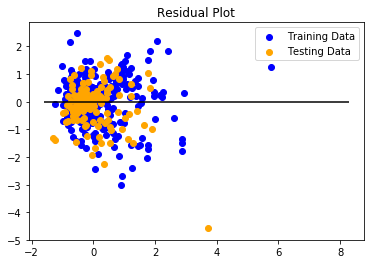

In [122]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [123]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5460078963875652, R2: 0.5235022196259644


In [124]:
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5518155843175149, R2: 0.5184338855853121


In [125]:
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5461175415855135, R2: 0.5234065329265657


In [126]:
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5591358286179251, R2: 0.5120455527717785


In [127]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [128]:
model = sm.OLS(y_train,X_train)

In [129]:
result = model.fit()

In [130]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     25.02
Date:                Sat, 21 Apr 2018   Prob (F-statistic):           3.72e-63
Time:                        11:24:49   Log-Likelihood:                -324.78
No. Observations:                 486   AIC:                             691.6
Df Residuals:                     465   BIC:                             779.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
draft_All_NBA             -0

In [161]:

result.summary.as_csv()

AttributeError: 'function' object has no attribute 'as_csv'

In [133]:
clean_data.corr() 

,nba_VORP,draft_All_NBA,draft_All.Star,draft_Pk,draft_Yrs,draft_Games,draft_Minutes.Played,draft_PTS,draft_TRB,draft_AST,...,draft_FT_Percentage,draft_Minutes.per.Game,draft_Points.per.Game,draft_TRB.per.game,draft_Assits.per.Game,draft_Win.Share,draft_WS_per_game,draft_BPM,draft_VORP,draft_attend_college
nba_VORP,1.000000,0.450949,0.443286,-0.169865,0.287520,0.332240,0.444095,0.475667,0.421394,0.476463,...,0.067414,0.434175,0.465139,0.382696,0.418057,0.588579,0.390020,0.489985,0.686239,-0.012144
draft_All_NBA,0.450949,1.000000,0.901058,-0.211136,0.237533,0.282910,0.407665,0.564936,0.418348,0.499247,...,0.094009,0.341477,0.496121,0.307333,0.384960,0.656449,0.288907,0.327545,0.736642,-0.087303
draft_All.Star,0.443286,0.901058,1.000000,-0.221471,0.266016,0.313801,0.448651,0.596017,0.450480,0.513757,...,0.103030,0.363224,0.507574,0.323000,0.386651,0.667555,0.289774,0.323054,0.709470,-0.053589
draft_Pk,-0.169865,-0.211136,-0.221471,1.000000,-0.336076,-0.379099,-0.406059,-0.404478,-0.392645,-0.296378,...,-0.177968,-0.535792,-0.506044,-0.440763,-0.303621,-0.355390,-0.275745,-0.337989,-0.273973,0.091959
draft_Yrs,0.287520,0.237533,0.266016,-0.336076,1.000000,0.961786,0.883353,0.790162,0.769393,0.633493,...,0.279779,0.621618,0.546056,0.466698,0.361730,0.738706,0.462285,0.528659,0.522092,-0.152895
draft_Games,0.332240,0.282910,0.313801,-0.379099,0.961786,1.000000,0.953793,0.865661,0.821689,0.711570,...,0.315353,0.728729,0.647966,0.529431,0.453149,0.810713,0.501579,0.589956,0.597781,-0.141357
draft_Minutes.Played,0.444095,0.407665,0.448651,-0.406059,0.883353,0.953793,1.000000,0.957134,0.857906,0.803143,...,0.307474,0.806556,0.764316,0.570157,0.560725,0.904708,0.490569,0.602663,0.739576,-0.119927
draft_PTS,0.475667,0.564936,0.596017,-0.404478,0.790162,0.865661,0.957134,1.000000,0.822084,0.805224,...,0.315639,0.792448,0.843487,0.554817,0.583324,0.933585,0.484761,0.582843,0.802054,-0.109507
draft_TRB,0.421394,0.418348,0.450480,-0.392645,0.769393,0.821689,0.857906,0.822084,1.000000,0.520366,...,0.144158,0.681762,0.643321,0.810528,0.291453,0.857753,0.500385,0.556058,0.691730,-0.155866
draft_AST,0.476463,0.499247,0.513757,-0.296378,0.633493,0.711570,0.803143,0.805224,0.520366,1.000000,...,0.298239,0.672664,0.672593,0.268893,0.852076,0.767540,0.367375,0.503774,0.736035,-0.064506


In [153]:
linreg = LinearRegression()

linreg_scores = cross_val_score(linreg, X_train, y_train, cv=5)

print (linreg_scores)
print (np.mean(linreg_scores))

[ 0.150675    0.55685498  0.47880531  0.37383241  0.57707367]
0.427448270748


In [154]:
linreg.fit(X_train, y_train)
linreg.score(X_test, y_test)

0.5235022196259782

In [155]:
lr_coef_df        =   pd.DataFrame(linreg.coef_, columns=["linear_coef"])
lr_coef_df.index  =   X.columns

ValueError: Shape of passed values is (21, 1), indices imply (1, 1)

In [ ]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)


In [132]:
feature_labels = np.array([
            "draft_All_NBA",
            "draft_All.Star",
            "draft_Pk",
            "draft_Yrs",
            "draft_Games",
            "draft_Minutes.Played",
            "draft_PTS",
            "draft_TRB",
            "draft_AST",
            "draft_FG_Percentage",
            "draft_TP_Percentage",
            "draft_FT_Percentage",
            "draft_Minutes.per.Game",
            "draft_Points.per.Game",
            "draft_TRB.per.game",
            "draft_Assits.per.Game",
            "draft_Win.Share",
            "draft_WS_per_game",
            "draft_BPM",
            "draft_VORP",
            "draft_attend_college"])
importance = model.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

draft_attend_college-0.00%
draft_All_NBA-0.00%
draft_Yrs-0.59%
draft_All.Star-0.61%
draft_AST-1.63%
draft_TP_Percentage-2.56%
draft_TRB-2.75%
draft_Games-2.83%
draft_Points.per.Game-3.59%
draft_Minutes.Played-4.17%
draft_Minutes.per.Game-5.27%
draft_Assits.per.Game-5.43%
draft_FT_Percentage-5.49%
draft_Pk-5.86%
draft_PTS-6.32%
draft_Win.Share-6.42%
draft_WS_per_game-6.50%
draft_TRB.per.game-6.84%
draft_FG_Percentage-9.86%
draft_VORP-11.09%
draft_BPM-12.19%
